In [1]:
import numpy as np
from matplotlib import pyplot as pl
import ebf
from astropy import constants as const
h = (const.h.cgs).value
import bc
%matplotlib inline

/Users/robyn/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
from matplotlib.patches import Rectangle as rect
from matplotlib.colors import LogNorm

In [3]:
h15 = ebf.read('halo15.ebf')

In [4]:

m_abs = np.array([h15['wfirst-hst_z087'], h15['wfirst-hst_y106'],
                  h15['wfirst-hst_j129'], h15['wfirst-hst_h158'],
                  h15['wfirst-hst_f184'], h15['wfirst-hst_w149']]).T

dvec = np.array([1000., 1000., 1000.]) / np.sqrt(3.)
xyz = np.array([h15['px'] + h15['center'][0] + dvec[0], 
                h15['py'] + h15['center'][1] + dvec[1], 
                h15['pz'] + h15['center'][2] + dvec[2]]).T

dist = np.sqrt((xyz**2).sum(axis=1))
dm = 5.0 * np.log10(dist*1000.)-5.0

m_app = m_abs + np.repeat(dm,6).reshape((-1,6))

# WFIRST zero points in vega and ab magnitudes
zp_AB = np.genfromtxt('/Users/robyn/Documents/Research/WINGS/wfirst.zeropoints', usecols=3) 

# conversions from AB to vega
AB_vega = np.genfromtxt('/Users/robyn/Documents/Research/WINGS/wfirst.zeropoints', usecols=2) 

# zero points are for 1 photon per second
n = ((m_app-zp_AB)/(-2.5)) #log10 of number of counts?



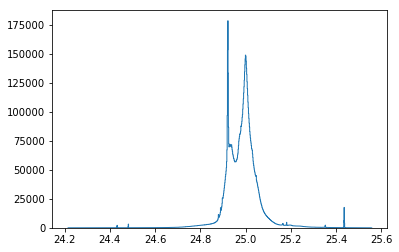

In [5]:
ht=pl.hist(dm,bins=1000,histtype='step')

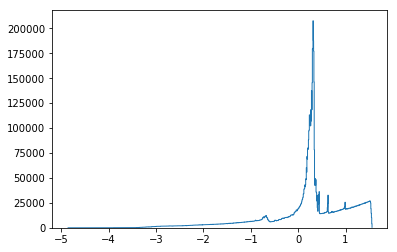

In [23]:
ht=pl.hist(m_abs[:,0],bins=1000,histtype='step')

In [6]:
ctr_xyz = np.array([dvec[0], dvec[1], dvec[2]])
ctr_lb = bc.XYZ_to_lbd(ctr_xyz[0], ctr_xyz[1], ctr_xyz[2], degree=True)
ctr_rad = bc.lb_to_radec(ctr_lb[0], ctr_lb[1], degree=True)

In [7]:
lb=bc.XYZ_to_lbd(xyz[:,0],xyz[:,1],xyz[:,2],degree=True)
rad = bc.lb_to_radec(lb[:,0],lb[:,1],degree=True)

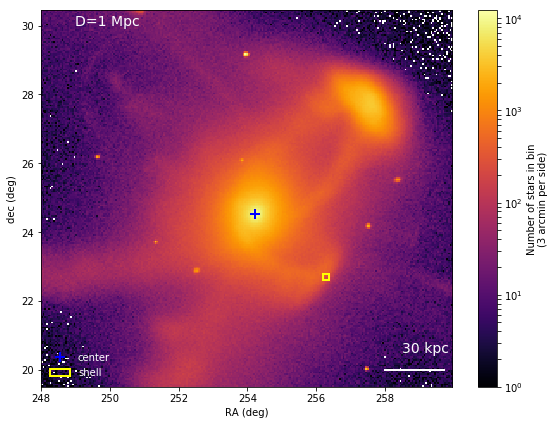

In [8]:
counts,xe,ye,im=pl.hist2d(rad[:,0],rad[:,1],bins=[np.arange(248.,260.,3./60.),np.arange(19.5,30.5,3./60.)],norm=LogNorm(),cmap='inferno')
ax=pl.gca()
pl.gcf().set_size_inches(8,6)
ax.set_aspect(1.0)
cb=pl.colorbar()
cb.ax.set_ylabel('Number of stars in bin\n(3 arcmin per side)')
pl.plot(ctr_rad[0],ctr_rad[1],'+',ms=10,color='b',zorder=97,mew=2,label='center')

fsize=10./60.

boxes=[(254.8,24.2),(254.45,24.0),(254.3,24.45),(254.3,24.25),(253.92,24.34),(253.8,25.05)]
labels=['stream','sat1','mix','shell','sat2','disrupt']

#r1=rect((254.8,24.2),fsize,fsize,facecolor='none',edgecolor='r',lw=2,zorder=98,label='stream')

#r2=rect((254.45,24.0),fsize,fsize,facecolor='none',edgecolor='lime',lw=2,zorder=99,label='sat1')

#r3=rect((254.3,24.45),fsize,fsize,facecolor='none',edgecolor='w',lw=2,zorder=96,label='mix')

r4=rect((256.2,22.6),fsize,fsize,facecolor='none',edgecolor='yellow',lw=2,zorder=95,label='shell')

#r5=rect((253.92, 24.34),fsize,fsize,facecolor='none',edgecolor='m',lw=2,zorder=94,label='sat2')

#r6=rect((253.8,25.05),fsize,fsize,facecolor='none',edgecolor='c',lw=2,zorder=94,label='disrupt')

#ax.add_patch(r1)
#ax.add_patch(r2)
#ax.add_patch(r3)
ax.add_patch(r4)
#ax.add_patch(r5)
#ax.add_patch(r6)


pl.plot([258.,258.+30./1000.*180./np.pi],[20.,20.],'-w',lw=2)
pl.text(258.48,20.5,'30 kpc',color='w',fontsize=14)


#pl.xlim(253,255)
#pl.ylim(23.5,25.5)

pl.xlabel('RA (deg)')
pl.ylabel('dec (deg)')

leg=pl.legend(loc='lower left',numpoints = 1)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
for text in leg.get_texts():
    text.set_color("white")

pl.text(249.0,30.0,'D=1 Mpc',fontsize=14,color='w')


pl.tight_layout()
pl.savefig('h15_shell_1Mpc.png')

In [9]:
b=(256.2,22.6)
s = (rad[:,0] > b[0]) & (rad[:,0] < (b[0] + fsize)) & (rad[:,1] > b[1]) & (rad[:,1] < (b[1] + fsize))

tab = np.vstack((rad[s,0], rad[s,1], h15['wfirst-hst_z087'][s],h15['wfirst-hst_y106'][s],h15['wfirst-hst_j129'][s],h15['wfirst-hst_h158'][s],h15['wfirst-hst_f184'][s],h15['wfirst-hst_w149'][s])).T

tab[:,2]

array([-0.59846061,  0.20817165,  0.81951714, ...,  0.38446462,
        0.28766426,  0.60834086])

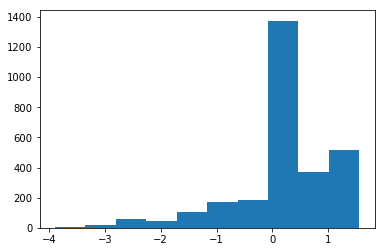

In [10]:
t=pl.hist(tab[:,2])

In [11]:
b=(256.2,22.6)
s = (rad[:,0]>b[0])&(rad[:,0]<(b[0]+fsize))&(rad[:,1]>b[1])&(rad[:,1]<(b[1]+fsize))
tab = np.vstack((rad[s,0], rad[s,1], h15['wfirst-hst_z087'][s],h15['wfirst-hst_y106'][s],h15['wfirst-hst_j129'][s],h15['wfirst-hst_h158'][s],h15['wfirst-hst_f184'][s],h15['wfirst-hst_w149'][s])).T
fname='h15.shell.1Mpc.in'
print 'writing', s.sum(), 'stars to '+fname
np.savetxt(fname,tab)

writing 2846 stars to h15.shell.1Mpc.in


In [12]:
import make_stips as ms
ms.DoAll(1.0,fname,'h15_shell_1Mpc')

Distance is d = 1.00 Mpc

Read in h15.shell.1Mpc.in 

Wrote out h15_shell_1Mpc_Z.tbl 

Wrote out h15_shell_1Mpc_Y.tbl 

Wrote out h15_shell_1Mpc_J.tbl 

Wrote out h15_shell_1Mpc_H.tbl 

Wrote out h15_shell_1Mpc_F.tbl 

Wrote out h15_shell_1Mpc_W.tbl 



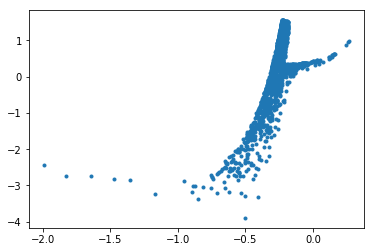

In [13]:
pl.plot(h15['wfirst-hst_y106'][s]-h15['wfirst-hst_z087'][s],h15['wfirst-hst_z087'][s],'.')

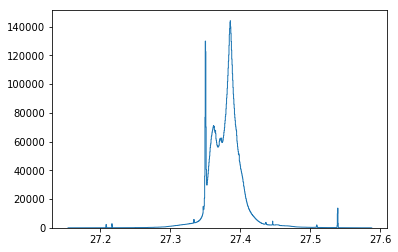

In [14]:
dvec=np.array([3000.,3000.,3000.])/np.sqrt(3.)
xyz = np.array([h15['px']+h15['center'][0]+dvec[0],h15['py']+h15['center'][1]+dvec[1],h15['pz']+h15['center'][2]+dvec[2]]).T

dist = np.sqrt((xyz**2).sum(axis=1))
dm = 5.0*np.log10(dist*1000.)-5.0
ht=pl.hist(dm,bins=1000,histtype='step')

In [15]:
ctr_xyz=np.array([dvec[0],dvec[1],dvec[2]])
ctr_lb=bc.XYZ_to_lbd(ctr_xyz[0],ctr_xyz[1],ctr_xyz[2],degree=True)
ctr_rad = bc.lb_to_radec(ctr_lb[0],ctr_lb[1],degree=True)

lb=bc.XYZ_to_lbd(xyz[:,0],xyz[:,1],xyz[:,2],degree=True)
rad = bc.lb_to_radec(lb[:,0],lb[:,1],degree=True)

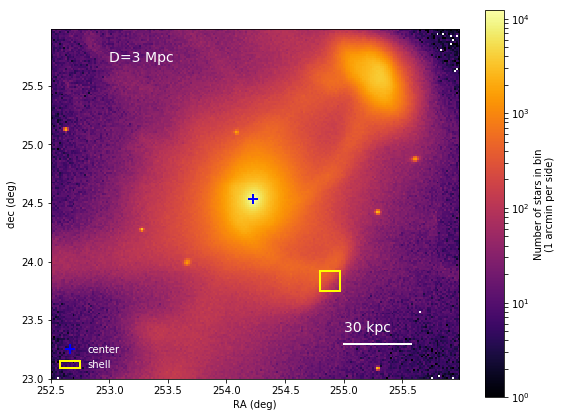

In [16]:
counts,xe,ye,im=pl.hist2d(rad[:,0],rad[:,1],bins=[np.arange(252.5,256.,1./60.),np.arange(23,26.,1./60.)],norm=LogNorm(),cmap='inferno')
ax=pl.gca()
pl.gcf().set_size_inches(8,6)
ax.set_aspect(1.0)
cb=pl.colorbar()
cb.ax.set_ylabel('Number of stars in bin\n(1 arcmin per side)')
pl.plot(ctr_rad[0],ctr_rad[1],'+',ms=10,color='b',zorder=97,mew=2,label='center')

fsize=10./60.

boxes=[(254.8,24.2),(254.45,24.0),(254.3,24.45),(254.3,24.25),(253.92,24.34),(253.8,25.05)]
labels=['stream','sat1','mix','shell','sat2','disrupt']

#r1=rect((254.8,24.2),fsize,fsize,facecolor='none',edgecolor='r',lw=2,zorder=98,label='stream')

#r2=rect((254.45,24.0),fsize,fsize,facecolor='none',edgecolor='lime',lw=2,zorder=99,label='sat1')

#r3=rect((254.3,24.45),fsize,fsize,facecolor='none',edgecolor='w',lw=2,zorder=96,label='mix')

r4=rect((254.8,23.75),fsize,fsize,facecolor='none',edgecolor='yellow',lw=2,zorder=95,label='shell')

#r5=rect((253.92, 24.34),fsize,fsize,facecolor='none',edgecolor='m',lw=2,zorder=94,label='sat2')

#r6=rect((253.8,25.05),fsize,fsize,facecolor='none',edgecolor='c',lw=2,zorder=94,label='disrupt')

#ax.add_patch(r1)
#ax.add_patch(r2)
#ax.add_patch(r3)
ax.add_patch(r4)
#ax.add_patch(r5)
#ax.add_patch(r6)


pl.plot([255.,255.+30./3000.*180./np.pi],[23.3,23.3],'-w',lw=2)
pl.text(255.,23.4,'30 kpc',color='w',fontsize=14)


#pl.xlim(253,255)
#pl.ylim(23.5,25.5)

pl.xlabel('RA (deg)')
pl.ylabel('dec (deg)')

leg=pl.legend(loc='lower left',numpoints = 1)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
for text in leg.get_texts():
    text.set_color("white")

pl.text(253,25.7,'D=3 Mpc',fontsize=14,color='w')


pl.tight_layout()
pl.savefig('h15_shell_3Mpc.png')

In [17]:
b=(254.8,23.75)
s = (rad[:,0]>b[0])&(rad[:,0]<(b[0]+fsize))&(rad[:,1]>b[1])&(rad[:,1]<(b[1]+fsize))
tab = np.vstack((rad[s,0], rad[s,1], h15['wfirst-hst_z087'][s],h15['wfirst-hst_y106'][s],h15['wfirst-hst_j129'][s],h15['wfirst-hst_h158'][s],h15['wfirst-hst_f184'][s],h15['wfirst-hst_w149'][s])).T
fname='h15.shell.3Mpc.in'
print 'writing', s.sum(), 'stars to '+fname
np.savetxt(fname,tab)

writing 20378 stars to h15.shell.3Mpc.in


In [18]:
ms.DoAll(3.0,fname,'h15_shell_3Mpc')

Distance is d = 3.00 Mpc

Read in h15.shell.3Mpc.in 

Wrote out h15_shell_3Mpc_Z.tbl 

Wrote out h15_shell_3Mpc_Y.tbl 

Wrote out h15_shell_3Mpc_J.tbl 

Wrote out h15_shell_3Mpc_H.tbl 

Wrote out h15_shell_3Mpc_F.tbl 

Wrote out h15_shell_3Mpc_W.tbl 



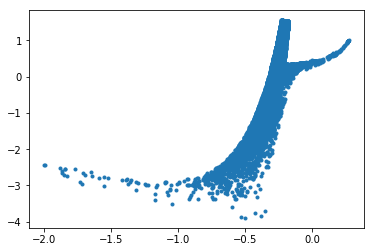

In [19]:
pl.plot(h15['wfirst-hst_y106'][s]-h15['wfirst-hst_z087'][s],h15['wfirst-hst_z087'][s],'.')

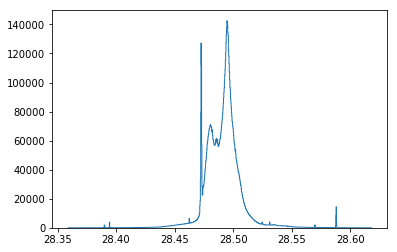

In [20]:
dvec=np.array([5000.,5000.,5000.])/np.sqrt(3.)
xyz = np.array([h15['px']+h15['center'][0]+dvec[0],h15['py']+h15['center'][1]+dvec[1],h15['pz']+h15['center'][2]+dvec[2]]).T

dist = np.sqrt((xyz**2).sum(axis=1))
dm = 5.0*np.log10(dist*1000.)-5.0
ht=pl.hist(dm,bins=1000,histtype='step')

In [21]:
ctr_xyz=np.array([dvec[0],dvec[1],dvec[2]])
ctr_lb=bc.XYZ_to_lbd(ctr_xyz[0],ctr_xyz[1],ctr_xyz[2],degree=True)
ctr_rad = bc.lb_to_radec(ctr_lb[0],ctr_lb[1],degree=True)

lb=bc.XYZ_to_lbd(xyz[:,0],xyz[:,1],xyz[:,2],degree=True)
rad = bc.lb_to_radec(lb[:,0],lb[:,1],degree=True)

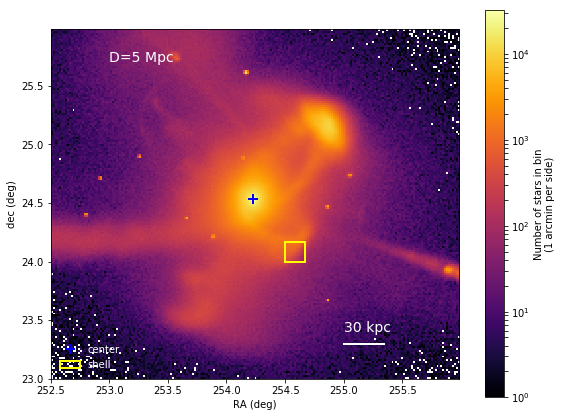

In [22]:
counts,xe,ye,im=pl.hist2d(rad[:,0],rad[:,1],bins=[np.arange(252.5,256.,1./60.),np.arange(23,26.,1./60.)],norm=LogNorm(),cmap='inferno')
ax=pl.gca()
pl.gcf().set_size_inches(8,6)
ax.set_aspect(1.0)
cb=pl.colorbar()
cb.ax.set_ylabel('Number of stars in bin\n(1 arcmin per side)')
pl.plot(ctr_rad[0],ctr_rad[1],'+',ms=10,color='b',zorder=97,mew=2,label='center')

fsize=10./60.

boxes=[(254.8,24.2),(254.45,24.0),(254.3,24.45),(254.3,24.25),(253.92,24.34),(253.8,25.05)]
labels=['stream','sat1','mix','shell','sat2','disrupt']

#r1=rect((254.8,24.2),fsize,fsize,facecolor='none',edgecolor='r',lw=2,zorder=98,label='stream')

#r2=rect((254.45,24.0),fsize,fsize,facecolor='none',edgecolor='lime',lw=2,zorder=99,label='sat1')

#r3=rect((254.3,24.45),fsize,fsize,facecolor='none',edgecolor='w',lw=2,zorder=96,label='mix')

r4=rect((254.5,24.0),fsize,fsize,facecolor='none',edgecolor='yellow',lw=2,zorder=95,label='shell')

#r5=rect((253.92, 24.34),fsize,fsize,facecolor='none',edgecolor='m',lw=2,zorder=94,label='sat2')

#r6=rect((253.8,25.05),fsize,fsize,facecolor='none',edgecolor='c',lw=2,zorder=94,label='disrupt')

#ax.add_patch(r1)
#ax.add_patch(r2)
#ax.add_patch(r3)
ax.add_patch(r4)
#ax.add_patch(r5)
#ax.add_patch(r6)


pl.plot([255.,255.+30./5000.*180./np.pi],[23.3,23.3],'-w',lw=2)
pl.text(255.,23.4,'30 kpc',color='w',fontsize=14)


#pl.xlim(253,255)
#pl.ylim(23.5,25.5)

pl.xlabel('RA (deg)')
pl.ylabel('dec (deg)')

leg=pl.legend(loc='lower left',numpoints = 1)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
for text in leg.get_texts():
    text.set_color("white")

pl.text(253,25.7,'D=5 Mpc',fontsize=14,color='w')


pl.tight_layout()
pl.savefig('h15_shell_5Mpc.png')

In [23]:
b=(254.5,24.0)
s = (rad[:,0]>b[0])&(rad[:,0]<(b[0]+fsize))&(rad[:,1]>b[1])&(rad[:,1]<(b[1]+fsize))
tab = np.vstack((rad[s,0], rad[s,1], h15['wfirst-hst_z087'][s],h15['wfirst-hst_y106'][s],h15['wfirst-hst_j129'][s],h15['wfirst-hst_h158'][s],h15['wfirst-hst_f184'][s],h15['wfirst-hst_w149'][s])).T
fname='h15.shell.5Mpc.in'
print 'writing', s.sum(), 'stars to '+fname
np.savetxt(fname,tab)

writing 59614 stars to h15.shell.5Mpc.in


In [24]:
ms.DoAll(5.0,fname,'h15_shell_5Mpc')

Distance is d = 5.00 Mpc

Read in h15.shell.5Mpc.in 

Wrote out h15_shell_5Mpc_Z.tbl 

Wrote out h15_shell_5Mpc_Y.tbl 

Wrote out h15_shell_5Mpc_J.tbl 

Wrote out h15_shell_5Mpc_H.tbl 

Wrote out h15_shell_5Mpc_F.tbl 

Wrote out h15_shell_5Mpc_W.tbl 



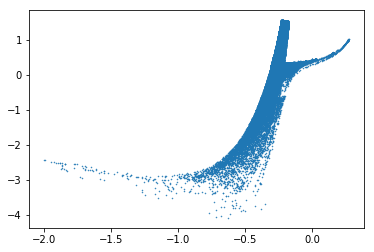

In [25]:
pl.plot(h15['wfirst-hst_y106'][s]-h15['wfirst-hst_z087'][s],h15['wfirst-hst_z087'][s],'.',ms=1)

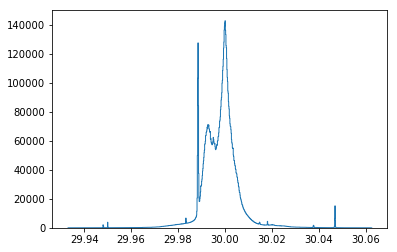

In [26]:
dvec=np.array([10000.,10000.,10000.])/np.sqrt(3.)
xyz = np.array([h15['px']+h15['center'][0]+dvec[0],h15['py']+h15['center'][1]+dvec[1],h15['pz']+h15['center'][2]+dvec[2]]).T

dist = np.sqrt((xyz**2).sum(axis=1))
dm = 5.0*np.log10(dist*1000.)-5.0
ht=pl.hist(dm,bins=1000,histtype='step')

In [27]:
ctr_xyz=np.array([dvec[0],dvec[1],dvec[2]])
ctr_lb=bc.XYZ_to_lbd(ctr_xyz[0],ctr_xyz[1],ctr_xyz[2],degree=True)
ctr_rad = bc.lb_to_radec(ctr_lb[0],ctr_lb[1],degree=True)

lb=bc.XYZ_to_lbd(xyz[:,0],xyz[:,1],xyz[:,2],degree=True)
rad = bc.lb_to_radec(lb[:,0],lb[:,1],degree=True)

In [29]:
rad[:,0].min()

252.33216481756284

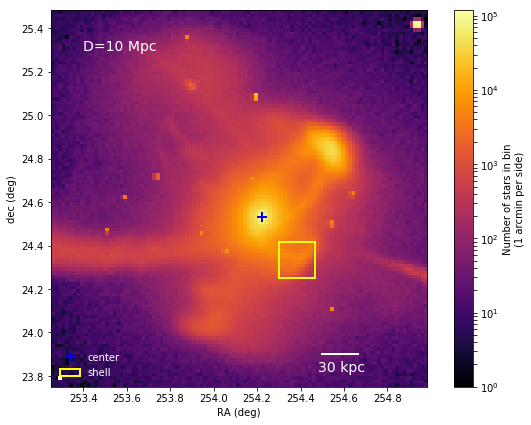

In [40]:
counts,xe,ye,im=pl.hist2d(rad[:,0],rad[:,1],
                          bins=[np.arange(253.25,255.,1./60.),np.arange(23.75,25.5,1./60.)],
                          norm=LogNorm(),
                          cmap='inferno')
ax=pl.gca()
pl.gcf().set_size_inches(8,6)
ax.set_aspect(1.0)
cb=pl.colorbar()
cb.ax.set_ylabel('Number of stars in bin\n(1 arcmin per side)')
pl.plot(ctr_rad[0],ctr_rad[1],'+',ms=10,color='b',zorder=97,mew=2,label='center')

fsize=10./60.

boxes=[(254.8,24.2),(254.45,24.0),(254.3,24.45),(254.3,24.25),(253.92,24.34),(253.8,25.05)]
labels=['stream','sat1','mix','shell','sat2','disrupt']

#r1=rect((254.8,24.2),fsize,fsize,facecolor='none',edgecolor='r',lw=2,zorder=98,label='stream')

#r2=rect((254.45,24.0),fsize,fsize,facecolor='none',edgecolor='lime',lw=2,zorder=99,label='sat1')

#r3=rect((254.3,24.45),fsize,fsize,facecolor='none',edgecolor='w',lw=2,zorder=96,label='mix')

r4=rect((254.3,24.25),fsize,fsize,facecolor='none',edgecolor='yellow',lw=2,zorder=95,label='shell')

#r5=rect((253.92, 24.34),fsize,fsize,facecolor='none',edgecolor='m',lw=2,zorder=94,label='sat2')

#r6=rect((253.8,25.05),fsize,fsize,facecolor='none',edgecolor='c',lw=2,zorder=94,label='disrupt')

#ax.add_patch(r1)
#ax.add_patch(r2)
#ax.add_patch(r3)
ax.add_patch(r4)
#ax.add_patch(r5)
#ax.add_patch(r6)


pl.plot([254.5,254.6667],[23.9,23.9],'-w',lw=2)
pl.text(254.48,23.82,'30 kpc',color='w',fontsize=14)



#pl.xlim(253,255)
#pl.ylim(23.5,25.5)

pl.xlabel('RA (deg)')
pl.ylabel('dec (deg)')

leg=pl.legend(loc='lower left',numpoints = 1)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_edgecolor('none')
for text in leg.get_texts():
    text.set_color("white")

pl.text(253.4,25.3,'D=10 Mpc',fontsize=14,color='w')


pl.tight_layout()
pl.savefig('h15_shell_10Mpc.png')

In [41]:
b=(254.3,24.25)
s = (rad[:,0]>b[0])&(rad[:,0]<(b[0]+fsize))&(rad[:,1]>b[1])&(rad[:,1]<(b[1]+fsize))
tab = np.vstack((rad[s,0], rad[s,1], h15['wfirst-hst_z087'][s],h15['wfirst-hst_y106'][s],h15['wfirst-hst_j129'][s],h15['wfirst-hst_h158'][s],h15['wfirst-hst_f184'][s],h15['wfirst-hst_w149'][s])).T
fname='h15.shell.10Mpc.in'
print 'writing', s.sum(), 'stars to '+fname
np.savetxt(fname,tab)

writing 294519 stars to h15.shell.10Mpc.in


In [42]:
ms.DoAll(10.0,fname,'h15_shell_10Mpc')

Distance is d = 10.00 Mpc

Read in h15.shell.10Mpc.in 

Wrote out h15_shell_10Mpc_Z.tbl 

Wrote out h15_shell_10Mpc_Y.tbl 

Wrote out h15_shell_10Mpc_J.tbl 

Wrote out h15_shell_10Mpc_H.tbl 

Wrote out h15_shell_10Mpc_F.tbl 

Wrote out h15_shell_10Mpc_W.tbl 

